In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [47]:
hpc_path = f'results/hpc_benchmark_2_16_1_daint_strict_thread_*.csv'

hpc_split_path = f'results/hpc_benchmark_2_16_1_daint_strict_split_thread_*.csv'

hpc_one_path = f'results/hpc_benchmark_2_16_1_daint_strict_one_thread_*.csv'
hpc_all_path = f'results/hpc_benchmark_2_16_1_daint_strict_all_thread_*.csv'
hpc_in_path = f'results/hpc_benchmark_2_16_1_daint_strict_in_thread_*.csv'
hpc_out_path = f'results/hpc_benchmark_2_16_1_daint_strict_out_thread_*.csv'
hpc_tot_path = f'results/hpc_benchmark_2_16_1_daint_strict_tot_thread_*.csv'
hpc_bern_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern_thread_*.csv'
hpc_bern_sym_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern-sym_thread_*.csv'

mam_path = f'results/multi-area-model_2_16_1_daint_strict_thread_*.csv'

mesocircuit_path = f'results/4x4_mesocircuit_2_16_1_daint_strict_thread_*.csv'

# HPC benchmark

In [48]:
hpc_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(hpc_path)])

In [49]:
print(hpc_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                1               6                 4       24     20     True   
1                2               6                 4       48     40     True   
2                4               6                 4       96     80     True   
3                8               6                 4      192    160     True   
4               16               6                 4      384    320     True   
0                1               2                12       24     20     True   
1                2               2                12       48     40     True   
2                4               2                12       96     80     True   
3                8               2                12      192    160     True   
4               16               2                12      384    320     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  T_ini_max  T_equ   T_sim  \
0    0.39        75.88        77

In [57]:
hpc_res['T_bld_xn'] = hpc_res['T_conns_min'] + hpc_res['T_ini_max']
hpc_res['T_bld_nx'] = hpc_res['T_conns_max'] + hpc_res['T_ini_min']

hpc_res['T_bld'] = hpc_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

In [58]:
hpc_pres = pd.pivot_table(hpc_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                      values=['T_bld', 'VSize_sum'])

In [59]:
hpc_pres

T_bld   VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                    
20    4                1                142.45   104752416
      12               1                236.48   101868648
40    4                2                152.31   214484464
      12               2                236.64   203051504
80    4                4                157.80   428892040
      12               4                232.77   410024616
160   4                8                158.23   904560024
      12               8                255.49   838053720
320   4                16               168.61   954598104
      12               16               295.82  1882170744

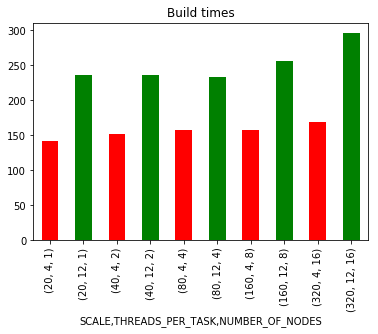

In [60]:
hpc_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g']*int(len(hpc_pres)/2))

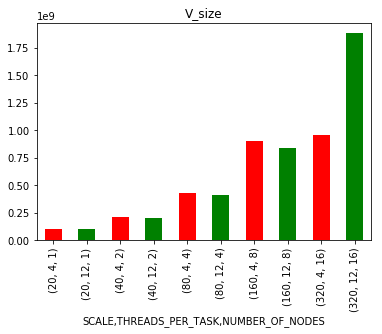

In [61]:
hpc_pres['VSize_sum'].plot(kind='bar', title='V_size', color = ['r', 'g']*int(len(hpc_pres)/2))

# HPC Benchmark - split into many `Connect` calls

In [74]:
hpc_split_res = pd.concat([pd.read_csv(bench)
                           for bench in glob.glob(hpc_split_path)])

In [78]:
print(hpc_split_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC  NBLOCKS  \
0                1               6                 4     20     True     1000   
1                2               6                 4     40     True     1000   
2                4               6                 4     80     True     1000   
3                8               6                 4    160     True     1000   
4               16               6                 4    320     True     1000   
0                1               2                12     20     True     1000   
1                2               2                12     40     True     1000   
2                4               2                12     80     True     1000   
3                8               2                12    160     True     1000   
4               16               2                12    320     True     1000   
0                1              24                 1     20     True     1000   
1                2          

In [80]:
hpc_split_res['T_bld'] = hpc_split_res['EE_inner_conn_time'] + hpc_split_res['EI_inner_conn_time'] + hpc_split_res['IE_inner_conn_time'] + hpc_split_res['II_inner_conn_time']

In [81]:
hpc_split_pres = pd.pivot_table(hpc_split_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])

In [82]:
hpc_split_pres

EE_conns_per_sec  N_conns_sum  T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
20    1                1                       2169020.0   2520225000   49.0   
      4                1                       4035270.0   2520225000  124.0   
      12               1                       9464830.0   2520225000  224.0   
40    1                2                       2142860.0   5040450000  162.0   
      4                2                       4001190.0   5040450000  168.0   
      12               2                       9119570.0   5040450000  279.0   
80    1                4                       2085910.0   5040450000  151.0   
      4                4                       3950260.0  10080900000  163.0   
      12               4                       9429570.0  10080900000  274.0   
160   1                8                       2017330.0   5040450000  193.0   
      4                8                       3803890.0  20161800000  328.0   
      12               8                       8764340.0  20161800000  188.0   
320   1                16                      1862580.0   5040450000  161.0   
      4                16                      3642250.0  20161800000  220.0   
      12               16                      8392910.0  40323600000   95.0   

                                         VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES              
20    1                1                 108664800  
      4                1                 104721696  
      12               1                 110087768  
40    1                2                 254238928  
      4                2                 218385904  
      12               2                 203094512  
80    1                4                 254344720  
      4                4                 432689032  
      12               4                 410079912  
160   1                8                 261339088  
      4                8                 897822104  
      12               8                 832610136  
320   1                16                262001488  
      4                16                956072664  
      12               16               1884220788

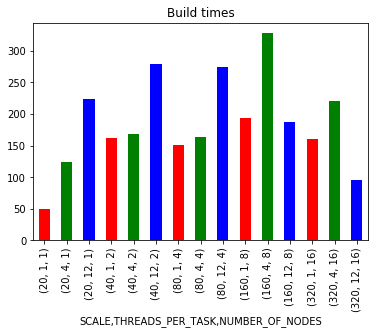

In [85]:
hpc_split_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

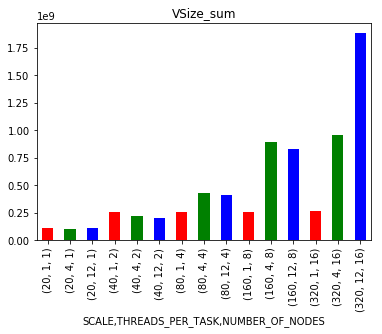

In [86]:
hpc_split_pres['VSize_sum'].plot(kind='bar', title='VSize_sum', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

# HPC Benchmark - only `one_to_one` calls

In [87]:
hpc_one_res = pd.concat([pd.read_csv(bench)
                         for bench in glob.glob(hpc_one_path)])

In [88]:
print(hpc_one_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC RULE  \
0                1              24                 1     20     True  one   
1                2              24                 1     40     True  one   
2                4              24                 1     80     True  one   
3                8              24                 1    160     True  one   
4               16              24                 1    320     True  one   
0                1               2                12     20     True  one   
1                2               2                12     40     True  one   
2                4               2                12     80     True  one   
3                8               2                12    160     True  one   
4               16               2                12    320     True  one   
0                1               6                 4     20     True  one   
1                2               6                 4     40     True  one   

In [106]:
hpc_in_pres = pd.pivot_table(hpc_in_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                             values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])

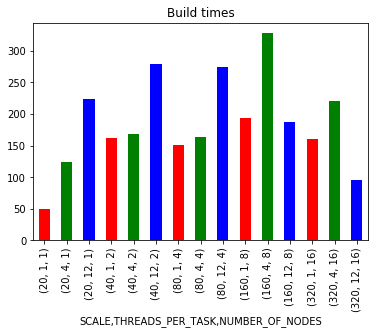

In [107]:
hpc_split_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

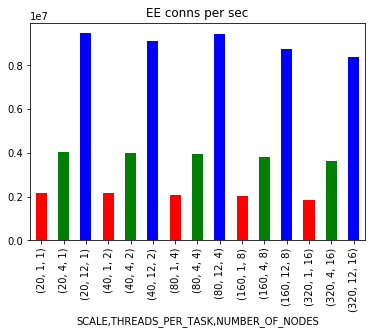

In [109]:
hpc_split_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

# HBC Benchmark - only `fixed_indegree` calls

In [102]:
hpc_in_res = pd.concat([pd.read_csv(bench)
                        for bench in glob.glob(hpc_in_path)])

In [104]:
print(hpc_in_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC RULE  \
0                1               2                12     20     True   in   
1                2               2                12     40     True   in   
2                4               2                12     80     True   in   
3                8               2                12    160     True   in   
4               16               2                12    320     True   in   
0                1              24                 1     20     True   in   
1                2              24                 1     40     True   in   
2                4              24                 1     80     True   in   
3                8              24                 1    160     True   in   
4               16              24                 1    320     True   in   
0                1               6                 4     20     True   in   
1                2               6                 4     40     True   in   

In [105]:
hpc_in_res['T_bld'] = hpc_in_res['EE_inner_conn_time'] + hpc_in_res['EI_inner_conn_time'] + hpc_in_res['IE_inner_conn_time'] + hpc_in_res['II_inner_conn_time']

# Multi-Area-Model

In [96]:
mam_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(mam_path)])

In [97]:
print(mam_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  NUM_VPS  THREADS_PER_TASK   SCALE  \
0                1               6       24                 4  0.0625   
1                2               6       48                 4  0.1250   
2                4               6       96                 4  0.2500   
3                8               6      192                 4  0.5000   
4               16               6      384                 4  1.0000   

   T_network_local  T_network_global_avg  T_create_avg  T_connect_avg  T_sim  \
0              NaN                   NaN           NaN            NaN    NaN   
1              NaN                   NaN           NaN            NaN    NaN   
2              NaN                   NaN           NaN            NaN    NaN   
3              NaN                   NaN           NaN            NaN    NaN   
4              NaN                   NaN           NaN            NaN    NaN   

   VSize_sum  N_nrns  N_conns_sum  
0        NaN     NaN          NaN  
1       

In [98]:
mam_pres = pd.pivot_table(mam_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                          values=['T_connect_avg', 'VSize_sum', 'N_conns_sum'])

In [99]:
mam_pres

,,
SCALE,THREADS_PER_TASK,NUMBER_OF_NODES
0.0625,4,1
0.1250,4,2
0.2500,4,4
0.5000,4,8
1.0000,4,16


In [101]:
mam_pres['T_connect_avg'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

KeyError: 'T_connect_avg'

# 4x4 mesocircuit

In [89]:
meso_res = pd.concat([pd.read_csv(bench)
                      for bench in glob.glob(mesocircuit_path)])

In [90]:
print(meso_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK   SCALE  \
0                1               2                12  0.0625   
1                2               2                12  0.1250   
2                4               2                12  0.2500   
3                8               2                12  0.5000   
4               16               2                12  1.0000   
0                1               6                 4  0.0625   
1                2               6                 4  0.1250   
2                4               6                 4  0.2500   
3                8               6                 4  0.5000   
4               16               6                 4  1.0000   

                               hash  T_nrns  T_conns_avg  T_sim  VSize_sum  \
0  acd429db3b9ab17b5f5391184e500dc6    0.61   275.380000  19.89   21605960   
1  acd429db3b9ab17b5f5391184e500dc6    0.94   274.955000  23.64   43449764   
2  acd429db3b9ab17b5f5391184e500dc6    1.73   339.923750  28.

In [91]:
meso_pres = pd.pivot_table(meso_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                           values=['T_conns_avg', 'VSize_sum', 'N_conns_sum'])

In [92]:
meso_pres

N_conns_sum  T_conns_avg  VSize_sum
SCALE  THREADS_PER_TASK NUMBER_OF_NODES                                     
0.0625 4                1                  345513663   221.798333   23518496
       12               1                  345513663   275.380000   21605960
0.1250 4                2                  690961118   235.642500   49518064
       12               2                  690961118   274.955000   43449764
0.2500 4                4                 1382076915   328.076250  104634248
       12               4                 1382076915   339.923750   91284472
0.5000 4                8                 2764017366   432.631042  199583128
       12               8                 2764017366   484.997500  186989028
1.0000 4                16                5527838034   739.202708  452025848
       12               16                5527838034   765.540625  411247992

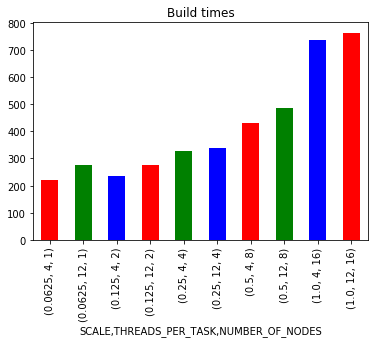

In [94]:
meso_pres['T_conns_avg'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

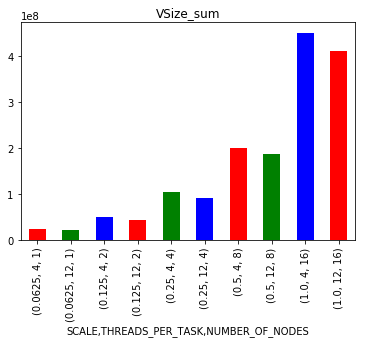

In [95]:
meso_pres['VSize_sum'].plot(kind='bar', title='VSize_sum', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))